In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/bigot-benjamin-2-notebook-exploration-012025/customers_features.csv")

In [3]:
df.describe()

,recency,frequency,monetary,avg_review_score,total_items
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000
mean,286.945586,1.079223,170.650658,4.086791,1.482095
std,153.240436,0.396154,235.775976,1.341065,2.567892
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,163.000000,1.000000,63.370000,4.000000,1.000000
50%,268.000000,1.000000,110.200000,5.000000,1.000000
75%,396.000000,1.000000,188.650000,5.000000,1.000000
max,772.000000,17.000000,13664.080000,5.000000,231.000000


In [4]:
df.isna().sum()

customer_unique_id    0
recency               0
frequency             0
monetary              0
avg_review_score      0
total_items           0
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df_rfm = df[['recency', 'frequency', 'monetary']]

df_rfm.head()

,recency,frequency,monetary
0,160,1,141.90
1,163,1,27.19
2,585,1,86.22
3,369,1,43.62
4,336,1,196.89


**Normalisation des données**

In [7]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_rfm)

**Simulation K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

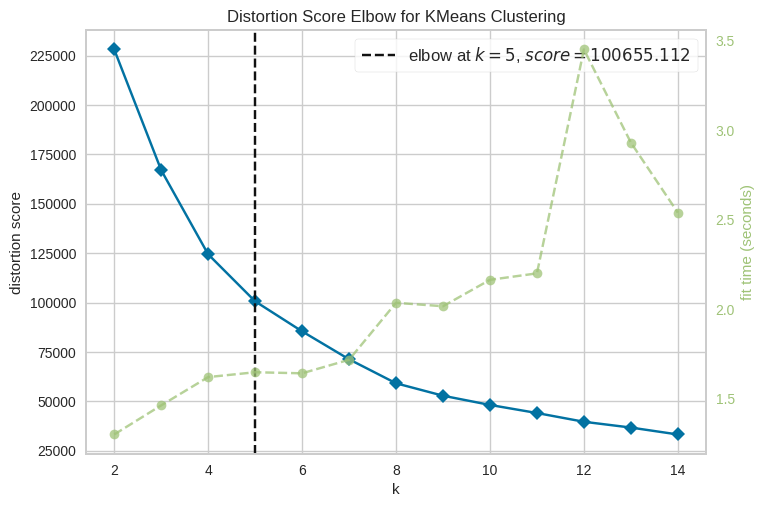

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
kmeans = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 15), metric='distortion')
elbow_visualizer.fit(rfm_scaled)
elbow_visualizer.show()

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_centers = kmeans.cluster_centers_
print("Centres des clusters :")
print(cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centres des clusters :
[[-0.71479142 -0.19998115 -0.1479618 ]
 [ 0.98471162 -0.19998115 -0.15325257]
 [-0.13269832  2.9394533   0.47104272]
 [-0.02477826  0.05577878  4.58427602]]


<ipython-input-9-aefcd7d35a33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['cluster'] = kmeans.fit_predict(rfm_scaled)


In [10]:
cluster_summary = df_rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].mean()

cluster_summary['cluster_size'] = df_rfm['cluster'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,cluster_size
cluster,,,,
0,177.406627,1.000000,135.711243,52178
1,437.842866,1.000000,134.472350,38763
2,266.610939,2.243692,281.710656,6143
3,283.215528,1.100976,1249.652346,2357


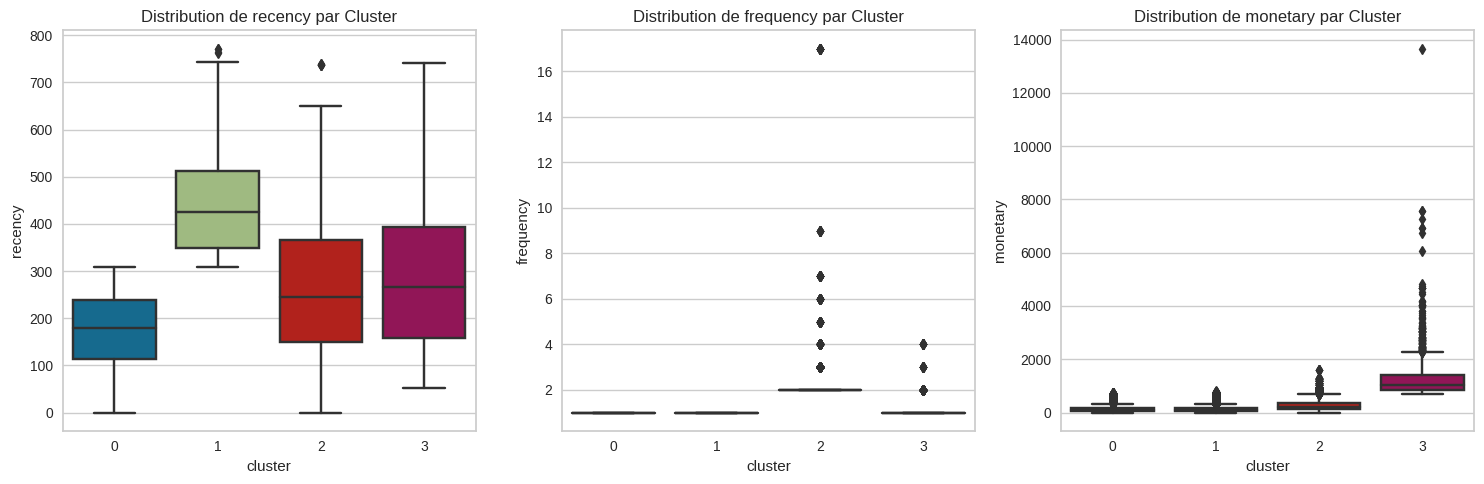

In [11]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['recency', 'frequency', 'monetary']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_rfm)
    plt.title(f"Distribution de {feature} par Cluster")
plt.tight_layout()
plt.show()

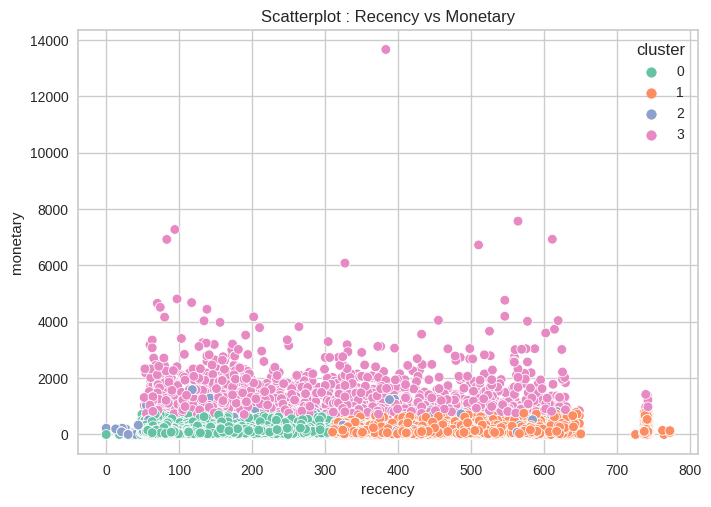

In [12]:
sns.scatterplot(data=df_rfm, x='recency', y='monetary', hue='cluster', palette='Set2')
plt.title("Scatterplot : Recency vs Monetary")
plt.show()

In [13]:
clusters = kmeans.fit_predict(rfm_scaled)
score = silhouette_score(rfm_scaled, clusters)
print(f"Score de silhouette : {score:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score de silhouette : 0.475


**Ajout de ReviewScore**

In [14]:
df_rfm_review = df[['recency', 'frequency', 'monetary', 'avg_review_score']]

In [15]:
df_rfm_review.isna().sum()

recency             0
frequency           0
monetary            0
avg_review_score    0
dtype: int64

In [16]:
df_rfm_review = df_rfm_review.fillna(0)

In [17]:
features = ['recency', 'frequency', 'monetary', 'avg_review_score']

scaler = StandardScaler()
rfm_review_scaled = scaler.fit_transform(df_rfm_review[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

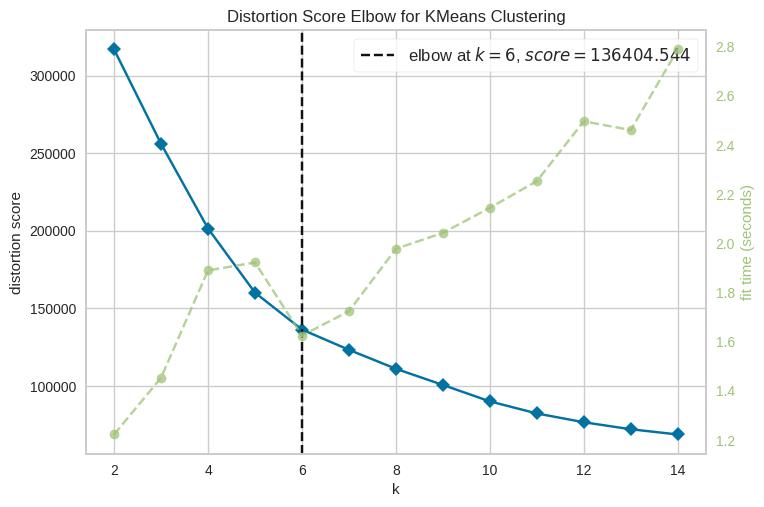

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
kmeans = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 15), metric='distortion')
elbow_visualizer.fit(rfm_review_scaled)
elbow_visualizer.show()

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_rfm_review['cluster'] = kmeans.fit_predict(rfm_review_scaled)

cluster_centers = kmeans.cluster_centers_
print("Centres des clusters :")
print(cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centres des clusters :
[[ 0.04012933 -0.1570881  -0.09726285 -1.87489038]
 [-0.75491097 -0.19998115 -0.15542541  0.4281592 ]
 [ 1.0133303  -0.19982331 -0.15077512  0.40118138]
 [-0.03115573  0.08143447  4.85090043 -0.07465063]
 [-0.15332029  2.96938114  0.50314415  0.15017463]]


In [20]:
cluster_summary = df_rfm_review.groupby('cluster')[features].mean()

cluster_summary['cluster_size'] = df_rfm_review['cluster'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,avg_review_score,cluster_size
cluster,,,,,
0,293.083142,1.016994,147.720572,1.572284,16947
1,171.199793,1.000000,133.998086,4.661145,42539
2,442.141558,1.000062,135.130391,4.624508,32008
3,282.070847,1.111537,1314.626539,3.986195,2089
4,263.450836,2.255548,289.279363,4.288184,5858


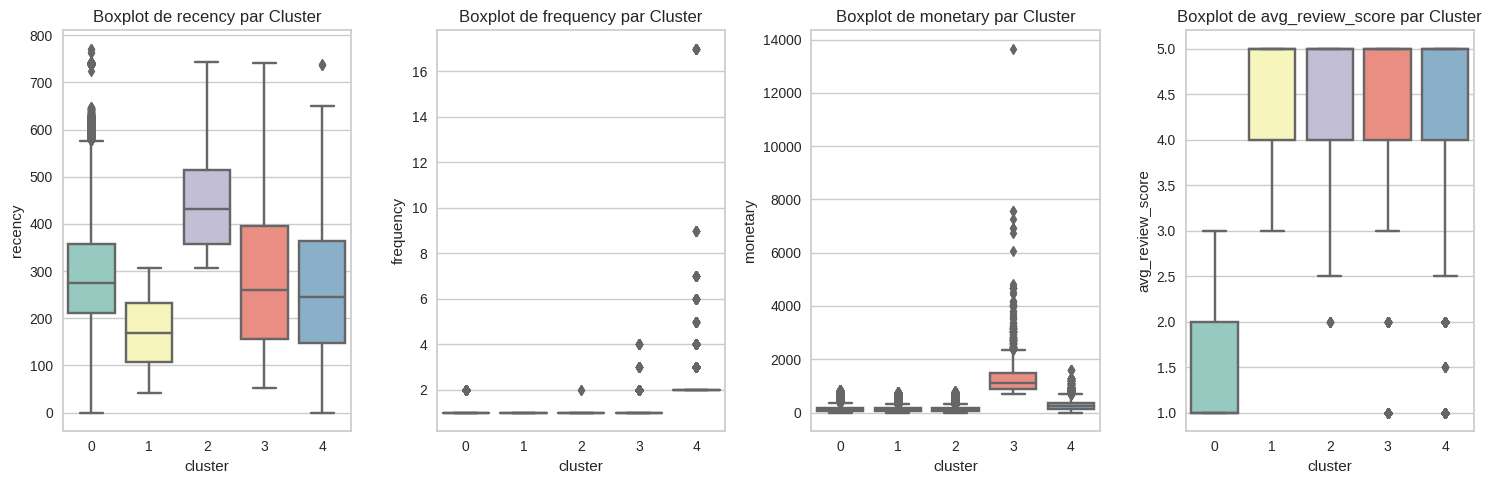

In [21]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_rfm_review, palette='Set3')
    plt.title(f"Boxplot de {feature} par Cluster")
plt.tight_layout()
plt.show()

In [22]:
clusters = kmeans.fit_predict(rfm_review_scaled)
score = silhouette_score(rfm_review_scaled, clusters)
print(f"Score de silhouette : {score:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score de silhouette : 0.402


**DBScan**

In [23]:
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples = 100
results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(rfm_review_scaled)

    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    if n_clusters > 1:
        score = silhouette_score(rfm_review_scaled, clusters)
    else:
        score = -1
    results.append((eps, n_clusters, score))

for eps, n_clusters, score in results:
    print(f"eps: {eps}, nombre de clusters: {n_clusters}, score de silhouette: {score:.3f}")

eps: 0.3, nombre de clusters: 7, score de silhouette: 0.121
eps: 0.5, nombre de clusters: 4, score de silhouette: 0.249
eps: 0.7, nombre de clusters: 4, score de silhouette: 0.365
eps: 1.0, nombre de clusters: 3, score de silhouette: 0.413


In [24]:
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples = 10
results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(rfm_review_scaled)

    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    if n_clusters > 1:
        score = silhouette_score(rfm_review_scaled, clusters)
    else:
        score = -1
    results.append((eps, n_clusters, score))

for eps, n_clusters, score in results:
    print(f"eps: {eps}, nombre de clusters: {n_clusters}, score de silhouette: {score:.3f}")

eps: 0.3, nombre de clusters: 33, score de silhouette: 0.071
eps: 0.5, nombre de clusters: 18, score de silhouette: 0.237
eps: 0.7, nombre de clusters: 11, score de silhouette: 0.408
eps: 1.0, nombre de clusters: 10, score de silhouette: 0.415


**Agglomerative Clustering**

In [25]:
stratified_sample, _ = train_test_split(
    df_rfm,
    test_size=0.6,
    stratify=df_rfm['frequency'],
    random_state=42
)

In [26]:
scaler = StandardScaler()
rfm_scaled_sample = scaler.fit_transform(stratified_sample)

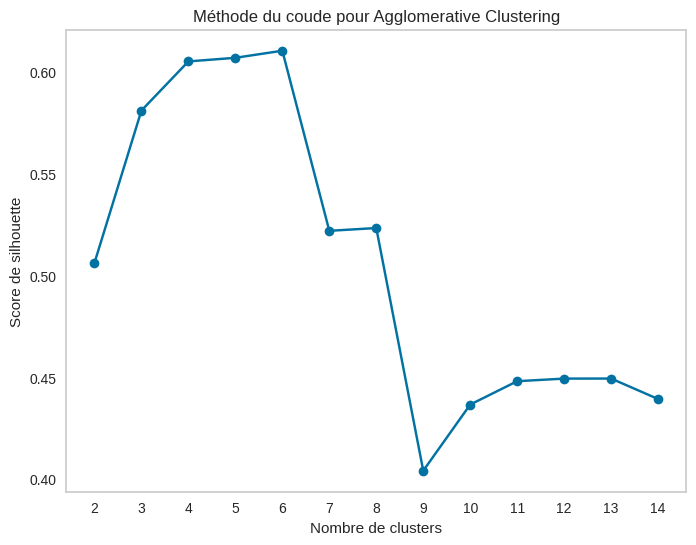

In [27]:
n_clusters_range = range(2, 15)
silhouette_scores = []

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(rfm_scaled_sample)
    
    score = silhouette_score(rfm_scaled_sample, clusters)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title("Méthode du coude pour Agglomerative Clustering")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.xticks(n_clusters_range)
plt.grid()
plt.show()

In [28]:
agglomerative = AgglomerativeClustering(n_clusters=4)
clusters = agglomerative.fit_predict(rfm_scaled_sample)
stratified_sample['clusters_agg'] = clusters

In [29]:
features = ['recency', 'frequency', 'monetary']

cluster_summary = stratified_sample.groupby('clusters_agg')[features].mean()

cluster_summary['cluster_size'] = stratified_sample['clusters_agg'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,cluster_size
clusters_agg,,,,
0,264.191708,2.240558,275.752315,2436
1,281.237395,1.138655,1233.142489,952
2,438.790150,1.000000,133.818190,15635
3,177.028960,1.000000,135.255534,20753


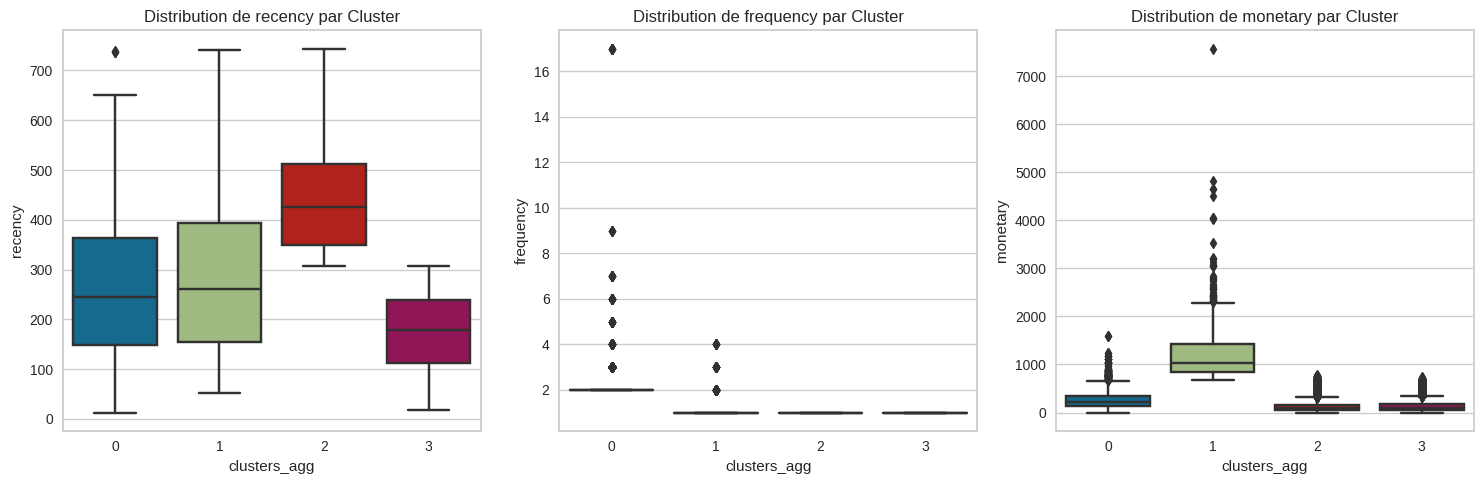

In [30]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['recency', 'frequency', 'monetary']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='clusters_agg', y=feature, data=stratified_sample)
    plt.title(f"Distribution de {feature} par Cluster")
plt.tight_layout()
plt.show()

In [31]:
score = silhouette_score(rfm_scaled_sample, clusters)
print(f"Score de silhouette : {score:.3f}")

Score de silhouette : 0.605


In [32]:
stratified_sample_review, _ = train_test_split(
    df_rfm_review,
    test_size=0.6,
    stratify=df_rfm_review['frequency'],
    random_state=42
)

scaler = StandardScaler()
rfm_scaled_review_sample = scaler.fit_transform(stratified_sample_review)

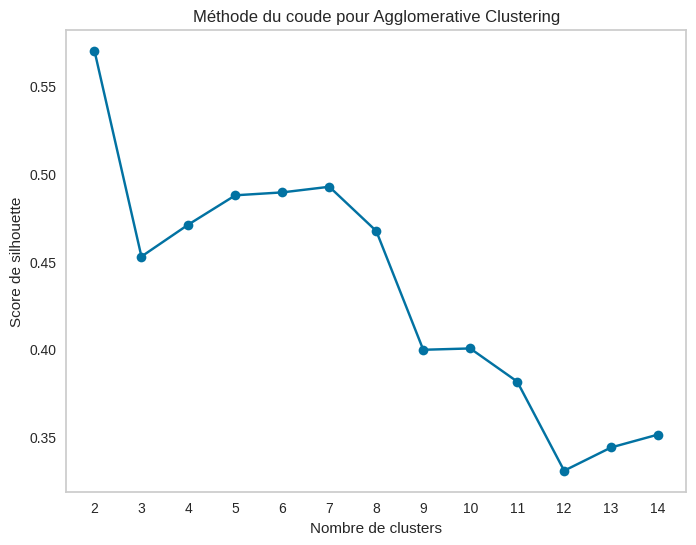

In [33]:
n_clusters_range = range(2, 15)
silhouette_scores = []

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(rfm_scaled_review_sample)
    
    score = silhouette_score(rfm_scaled_review_sample, clusters)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title("Méthode du coude pour Agglomerative Clustering")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.xticks(n_clusters_range)
plt.grid()
plt.show()

In [34]:
agglomerative = AgglomerativeClustering(n_clusters=5)
clusters = agglomerative.fit_predict(rfm_scaled_review_sample)
stratified_sample_review['clusters_agg'] = clusters

features = ['recency', 'frequency', 'monetary', 'avg_review_score']

cluster_summary = stratified_sample_review.groupby('clusters_agg')[features].mean()

cluster_summary['cluster_size'] = stratified_sample_review['clusters_agg'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,avg_review_score,cluster_size
clusters_agg,,,,,
0,260.886972,2.252804,285.904241,4.298525,2318
1,442.145708,1.000000,144.041279,4.625905,13081
2,295.843193,1.018728,146.982004,1.571046,6728
3,170.724313,1.000000,133.763241,4.657775,16983
4,251.331832,1.186186,1407.453078,3.961999,666


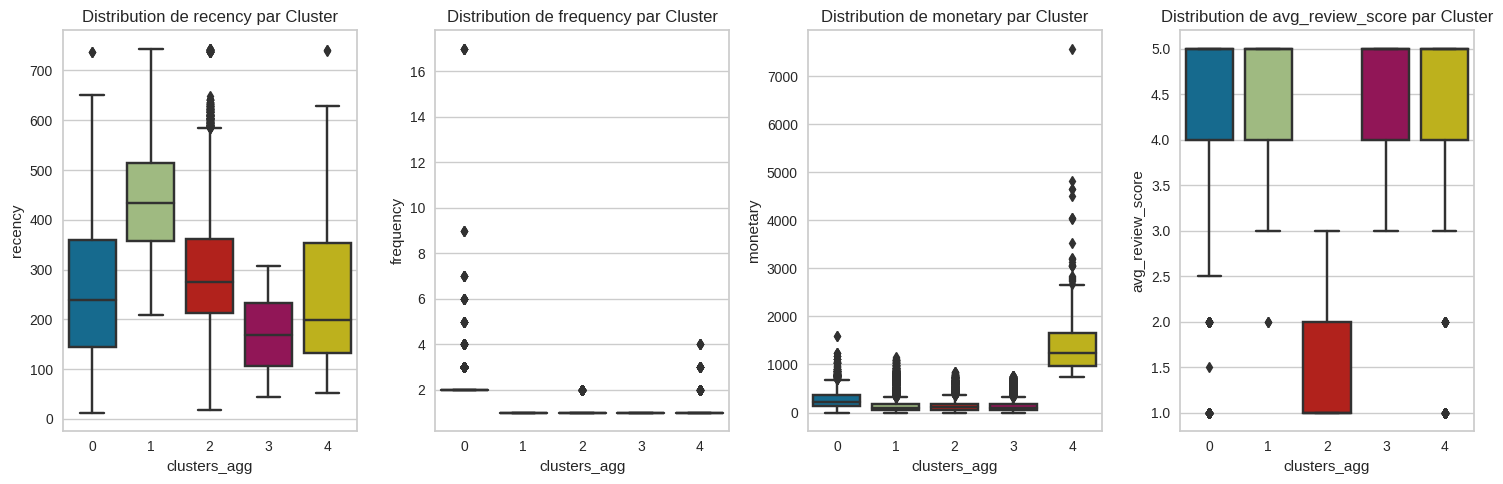

In [35]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='clusters_agg', y=feature, data=stratified_sample_review)
    plt.title(f"Distribution de {feature} par Cluster")
plt.tight_layout()
plt.show()

In [36]:
score = silhouette_score(rfm_scaled_review_sample, clusters)
print(f"Score de silhouette : {score:.3f}")

Score de silhouette : 0.488
